In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# NAME : HARSHAL HIRPARA 
# ROLL NO : 19BCE079
# DIVISION : B
# BATCH : E2
# SUBJECT : IRS

In [60]:
df = pd.read_csv('../input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [62]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D , Dense, Flatten,Dropout

In [63]:
# X_train.shape

In [64]:
y = np.array(df.pop('label'))
X_train = np.array(df)
print(type(X_train))
print(X_train[0])
X_train_reshaped  = X_train.reshape((42000,28,28,1))
print(X_train[0])

<class 'numpy.ndarray'>
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  2

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test , y_train, y_test = train_test_split(X_train_reshaped,y,test_size=.2,random_state=1)

In [66]:
print(y_train.shape)

(33600,)


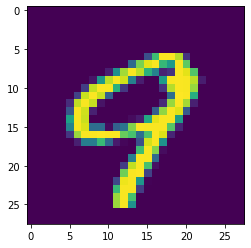

In [67]:
plt.imshow(X_train_reshaped[100])

In [68]:
input_shape = X_train_reshaped[1].shape
print(input_shape)

(28, 28, 1)


In [69]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size =(3,3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

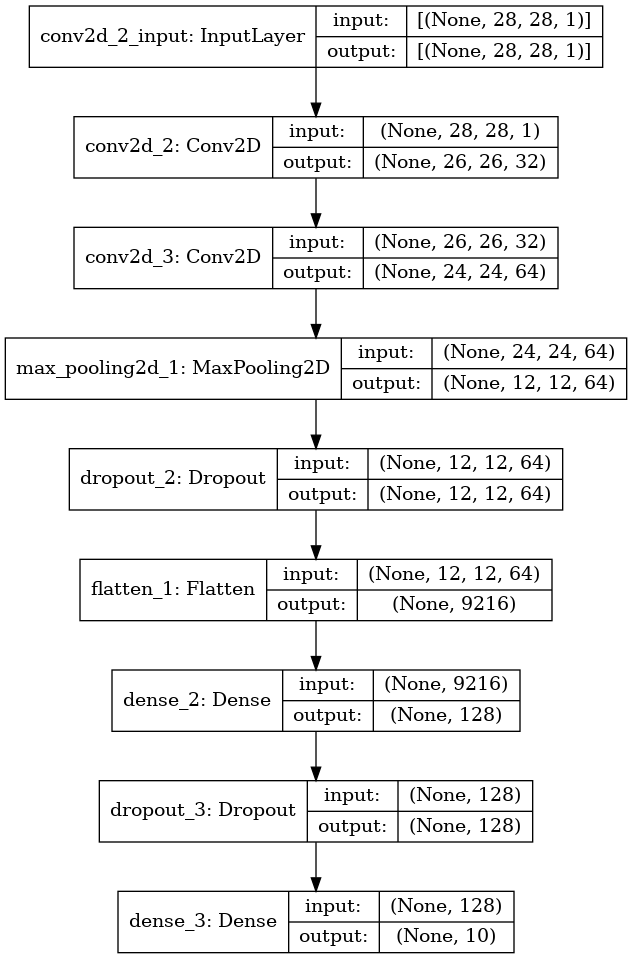

In [71]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [72]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
hiistory = model.fit(X_train, y_train ,batch_size=128 , epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
263/263 [==============================] - 2s 7ms/step - loss: 1.0667 - accuracy: 0.8041 - val_loss: 0.1089 - val_accuracy: 0.9662
Epoch 2/10
263/263 [==============================] - 2s 7ms/step - loss: 0.2070 - accuracy: 0.9391 - val_loss: 0.0701 - val_accuracy: 0.9785
Epoch 3/10
263/263 [==============================] - 2s 7ms/step - loss: 0.1524 - accuracy: 0.9541 - val_loss: 0.0647 - val_accuracy: 0.9825
Epoch 4/10
263/263 [==============================] - 2s 6ms/step - loss: 0.1190 - accuracy: 0.9640 - val_loss: 0.0640 - val_accuracy: 0.9840
Epoch 5/10
263/263 [==============================] - 2s 7ms/step - loss: 0.1014 - accuracy: 0.9686 - val_loss: 0.0632 - val_accuracy: 0.9824
Epoch 6/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0792 - accuracy: 0.9759 - val_loss: 0.0604 - val_accuracy: 0.9855
Epoch 7/10
263/263 [==============================] - 2s 6ms/step - loss: 0.0779 - accuracy: 0.9757 - val_loss: 0.0582 - val_accuracy: 0.9839
Epoch 

In [74]:
model.evaluate(X_test,y_test)

263/263 [==============================] - 1s 3ms/step - loss: 0.0573 - accuracy: 0.9864


[0.05728750675916672, 0.9864285588264465]

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

input_image = X_train[1].reshape(1,28,28,1)
print(input_image.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600,)
(8400,)
(1, 28, 28, 1)


2


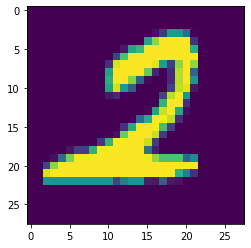

In [76]:
input_image = X_train[2].reshape(1,28,28,1)
# print(input_image.shape)
plt.imshow(X_train[2])
y_pred=model.predict(input_image)
print(np.argmax(y_pred))

In [77]:
def plot_learningCurve(hiistory,epochs):
    #plotting training and validation accuracy values
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,hiistory.history['accuracy'])
    plt.plot(epoch_range,hiistory.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    
    #plotting training and validation loss values
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,hiistory.history['loss'])
    plt.plot(epoch_range,hiistory.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

In [78]:
hiistory.history

{'loss': [1.0666942596435547,
  0.20695266127586365,
  0.1524488627910614,
  0.11898796260356903,
  0.1014147400856018,
  0.07922598719596863,
  0.07793207466602325,
  0.06905927509069443,
  0.061044950038194656,
  0.06035464629530907],
 'accuracy': [0.8040773868560791,
  0.9391071200370789,
  0.9540773630142212,
  0.9640178680419922,
  0.9685714244842529,
  0.9758928418159485,
  0.9756845235824585,
  0.9785119295120239,
  0.9809523820877075,
  0.9815178513526917],
 'val_loss': [0.10890666395425797,
  0.07009267807006836,
  0.06470595300197601,
  0.06397808343172073,
  0.063158318400383,
  0.06036120280623436,
  0.05822041258215904,
  0.05112803727388382,
  0.05695067718625069,
  0.05728749930858612],
 'val_accuracy': [0.9661904573440552,
  0.9784523844718933,
  0.9825000166893005,
  0.9840475916862488,
  0.9823809266090393,
  0.9854761958122253,
  0.9839285612106323,
  0.9872618913650513,
  0.9867857098579407,
  0.9864285588264465]}

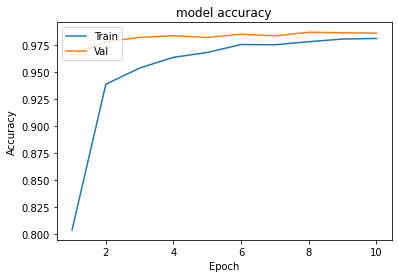

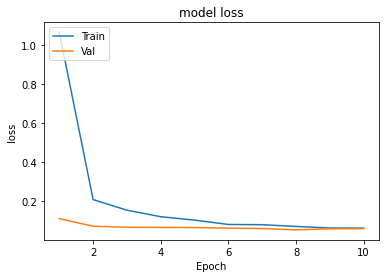

In [79]:
plot_learningCurve(hiistory,10)

In [80]:
df_test = pd.read_csv('../input/digit-recognizer/test.csv')
sample = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

In [81]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'numpy.ndarray'>
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  17  17  17
  17  81 180 180  35   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 139 253 253 253 253 253 253 253  48   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  60 228 253
 253 253 253 253 253 253 207 197  46   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 213 253 253 253 253 253 253 253 253 253 253
 223  52   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  66
 231 253 253 253 108  40  4

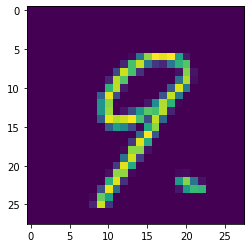

In [82]:
X_test = np.array(df_test)
print(type(X_test))
print(X_test[0])
X_test_reshaped  = X_test[2].reshape((28,28,1))
plt.imshow(X_test_reshaped)


X_test_reshaped  = X_test.reshape((28000,28,28,1))
label = model.predict(X_test_reshaped)
# print(X_test_reshaped[0])


In [83]:
final_label_list = []
for i in label:
    final_label_list.append(np.argmax(i))
print(final_label_list[:10])
print(len(final_label_list))


[2, 0, 9, 9, 3, 7, 0, 3, 0, 3]
28000


In [88]:
data= {
    'ImageId':list(range(1,28001)),
    'Label':final_label_list
}
# print(data)
df = pd.DataFrame(data).set_index('ImageId')
df

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


In [89]:
df.to_csv('submission.csv')